In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

print("test")

test


In [2]:
# load local model file and initialize model class
from model import ModelClass
model = ModelClass() # set a few number of periods.


par = model.par
sol = model.sol
sim = model.sim

In [3]:
# fig, ax = plt.subplots()
# a_mesh,s_mesh = np.meshgrid(par.a_grid,par.s_grid,indexing='ij')
# ax.scatter(a_mesh,s_mesh)
# ax.set(xlabel='asset, a',ylabel='human capital, k');

In [4]:


%time model.solve()

We are in t = 69
We are in t = 68
We are in t = 67
We are in t = 66
We are in t = 65
We are in t = 64
We are in t = 63
We are in t = 62
We are in t = 61


Traceback (most recent call last):
  File "c:\Users\Peter\Desktop\Speciale\Design_retirement\model.py", line 160, in solve
    optimal_c = golden_section_search_c(bc_min, bc_max, model_jit_par, model_jit_sol, hours, assets, savings, human_capital, t, x0=init_c)
  File "e:\Anaconda\lib\site-packages\numba\core\dispatcher.py", line 416, in _compile_for_args
    argtypes.append(self.typeof_pyval(a))
  File "e:\Anaconda\lib\site-packages\numba\core\dispatcher.py", line 733, in typeof_pyval
    tp = typeof(val, Purpose.argument)
  File "e:\Anaconda\lib\site-packages\numba\core\typing\typeof.py", line 33, in typeof
    ty = typeof_impl(val, c)
  File "e:\Anaconda\lib\functools.py", line 888, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
  File "e:\Anaconda\lib\site-packages\numba\core\typing\typeof.py", line 175, in _typeof_tuple
    tys = [typeof_impl(v, c) for v in val]
  File "e:\Anaconda\lib\site-packages\numba\core\typing\typeof.py", line 175, in <listcomp>
    tys = [t

KeyboardInterrupt: 

In [5]:
%time model.simulate()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at c:\Users\Peter\Desktop\Speciale\Design_retirement\model.py (263)[0m
[1m
File "model.py", line 263:[0m
[1mdef budget_constraint(par, a, h, s, k, t):
    <source elided>

[1m@njit
[0m[1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'types.SimpleNamespace'>[0m


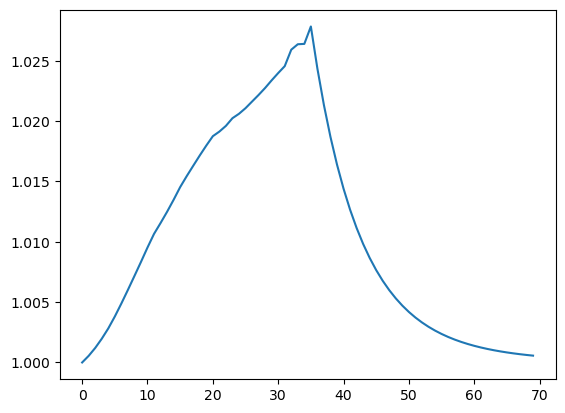

In [34]:
plt.plot(np.arange(par.T),model.sim.w.T)


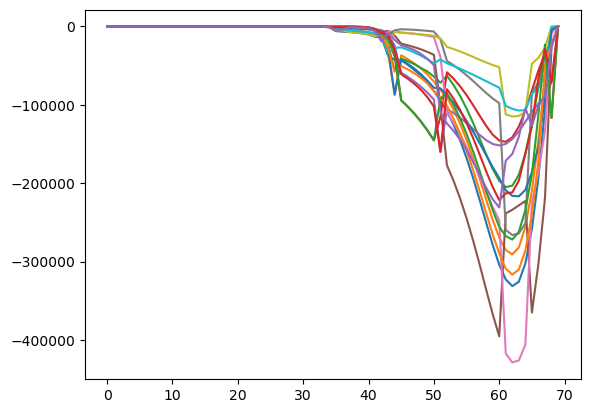

In [35]:
for i in range(sol.V.shape[3]):
    plt.plot(np.arange(par.T),sol.V[:, 1, 1, i])


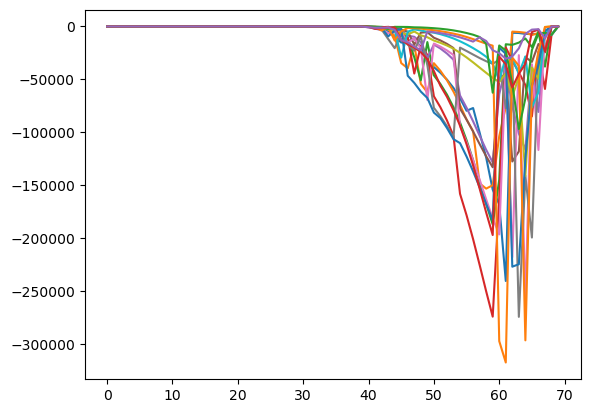

In [36]:
for i in range(sol.V.shape[3]):
    plt.plot(np.arange(par.T),sol.V[:, 4, 4, i])

In [34]:
sol.V[:-1, 4, 4, 4]-sol.V[1:, 4, 4, 4]

array([ 1.36135276e-05,  2.45915750e-05,  3.80922755e-05,  5.49846944e-05,
        7.61608804e-05,  1.01990398e-04,  1.32481716e-04,  1.67712943e-04,
        2.06641564e-04,  2.46998286e-04,  2.84913994e-04,  3.14823046e-04,
        3.31175607e-04,  3.32639202e-04,  3.18457803e-04,  2.88443415e-04,
        2.50932423e-04,  2.73151070e-04,  3.16137100e-04,  3.66361817e-04,
        4.24989709e-04,  4.93349282e-04,  5.72958046e-04,  6.65551775e-04,
        7.73121592e-04,  8.97984403e-04,  1.04318184e-03,  1.19678718e-03,
        1.35160107e-03,  1.70002735e-03,  2.54881450e-03,  1.36947968e-03,
       -3.20768106e-03,  1.76917963e-03,  2.01551968e-03,  3.37964251e-03,
        5.42600708e-03,  7.72033241e-03,  1.06481828e-02,  1.70797774e-02,
        2.48207578e-02,  3.69147088e-02,  6.17899176e-02,  1.00106810e-01,
        2.23306263e-01,  7.69781705e-02,  9.23087092e-02,  1.10927884e-01,
        1.32913024e-01,  1.57805008e-01,  1.84347286e-01,  2.10256426e-01,
        2.32094380e-01,  

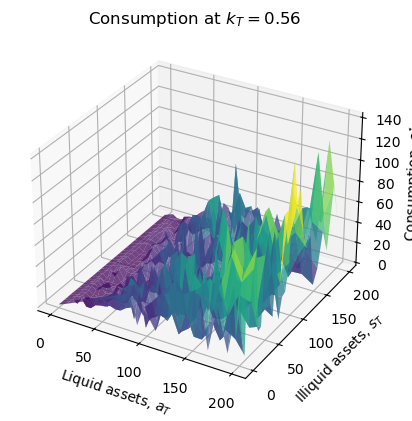

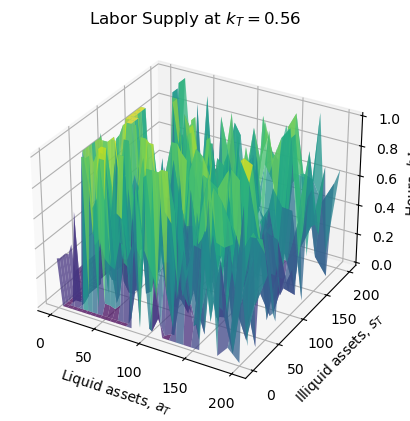

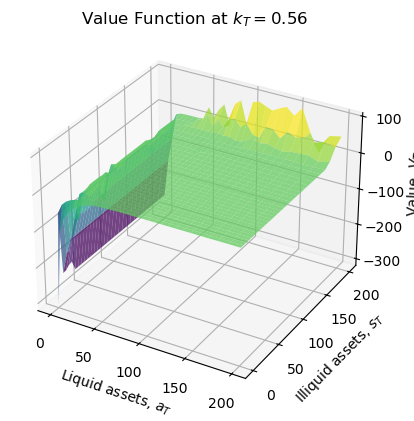

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Choose a fixed k index (e.g., middle of the k_grid)
k_idx = 2
k_fixed = par.k_grid[k_idx]  

# Extract the meshgrid for plotting
a_mesh, s_mesh = np.meshgrid(par.a_grid, par.s_grid, indexing='ij')

# Extract solutions at time t and fixed k
t = 30
c_plot = sol.c[t, :, :, k_idx]  # Fix k_idx
h_plot = sol.h[t, :, :, k_idx]
V_plot = sol.V[t, :, :, k_idx]

# Plot consumption
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a_mesh, s_mesh, c_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.75)
ax.set(xlabel='Liquid assets, $a_{T}$', ylabel='Illiquid assets, $s_T$', zlabel='Consumption, $c_{T}^{\star}$', title=f'Consumption at $k_T = {k_fixed:.2f}$')

# Plot labor supply
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a_mesh, s_mesh, h_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.75)
ax.set(xlabel='Liquid assets, $a_{T}$', ylabel='Illiquid assets, $s_T$', zlabel='Hours, $h_{T}^{\star}$', title=f'Labor Supply at $k_T = {k_fixed:.2f}$')

# Plot value function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a_mesh, s_mesh, V_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.75)
ax.set(xlabel='Liquid assets, $a_{T}$', ylabel='Illiquid assets, $s_T$', zlabel='Value, $V_{T}$', title=f'Value Function at $k_T = {k_fixed:.2f}$')

plt.show()
